In [ ]:
# Importação das bibliotecas principais
import numpy as np
import pandas as pd

# Bibliotecas para geração e divisão de conjuntos de dados
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Bibliotecas para pré-processamento
from sklearn.preprocessing import StandardScaler

# Biblioteca para o algoritmo kNN
from sklearn.neighbors import KNeighborsClassifier

# Bibliotecas para métricas e avaliação
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, RocCurveDisplay, ConfusionMatrixDisplay

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações adicionais
%matplotlib inline
sns.set(style="whitegrid")


In [ ]:
# Gerando dados sintéticos
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.01,
    class_sep=1.5,
    random_state=42
)

# Introduzindo discrepância nas escalas das características
X[:, 0] = X[:, 0] * 100  # Escala da primeira característica aumentada em 100 vezes

# Criando um DataFrame para melhor visualização
data_unequal = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data_unequal['Target'] = y

# Exibindo as primeiras linhas do conjunto de dados
data_unequal.head()


,Feature1,Feature2,Target
0,110.103418,2.035353,1
1,125.594526,-1.672352,0
2,185.447877,-1.448528,0
3,360.308970,-0.266515,0
4,125.317779,1.287514,1


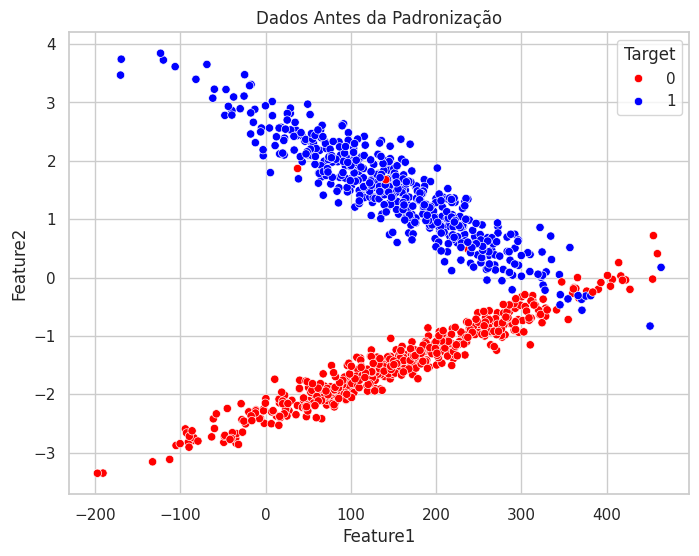

In [ ]:
# Plotando os dados antes da padronização
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Feature1',
    y='Feature2',
    hue='Target',
    data=data_unequal,
    palette=['red', 'blue']
)
plt.title('Dados Antes da Padronização')
plt.show()


In [ ]:
# Inicializando o scaler
scaler = StandardScaler()

# Aplicando a padronização
X_scaled = scaler.fit_transform(X)

# Criando um DataFrame para os dados padronizados
data_scaled = pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2'])
data_scaled['Target'] = y

# Exibindo as primeiras linhas do conjunto de dados padronizado
data_scaled.head()


,Feature1,Feature2,Target
0,-0.396673,1.242709,1
1,-0.252021,-1.007045,0
2,0.306875,-0.871233,0
3,1.939686,-0.154014,0
4,-0.254605,0.788937,1


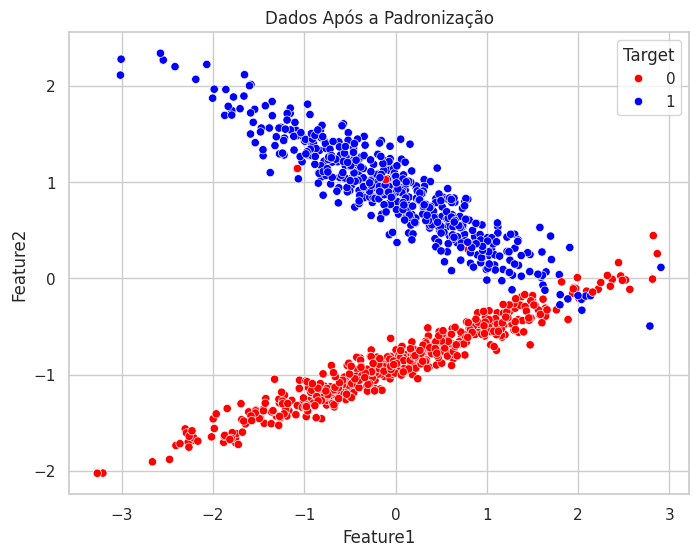

In [ ]:
# Plotando os dados após a padronização
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Feature1',
    y='Feature2',
    hue='Target',
    data=data_scaled,
    palette=['red', 'blue']
)
plt.title('Dados Após a Padronização')
plt.show()


As classes (vermelho para 0 e azul para 1) estão bem separadas no gráfico, o que indica que o modelo kNN pode distinguir bem entre essas classes. A separação linear sugere que as classes são linear

A padronização deve melhorou o desempenho do kNN. Neste caso, como os gráficos mostram uma separação clara entre as classes, o kNN deve ser capaz de classificar novos pontos com maior precisão.

In [ ]:
# Dividindo os dados sem padronização
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Dividindo os dados padronizados
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled,
    y,
    test_size=0.3,
    random_state=42
)


In [ ]:
# Inicializando o modelo kNN com k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Treinando o modelo com dados sem padronização
knn.fit(X_train, y_train)

# Realizando predições no conjunto de teste
y_pred = knn.predict(X_test)


In [ ]:
# Inicializando o modelo kNN com k=5
knn_scaled = KNeighborsClassifier(n_neighbors=5)

# Treinando o modelo com dados padronizados
knn_scaled.fit(X_train_scaled, y_train_scaled)

# Realizando predições no conjunto de teste padronizado
y_pred_scaled = knn_scaled.predict(X_test_scaled)


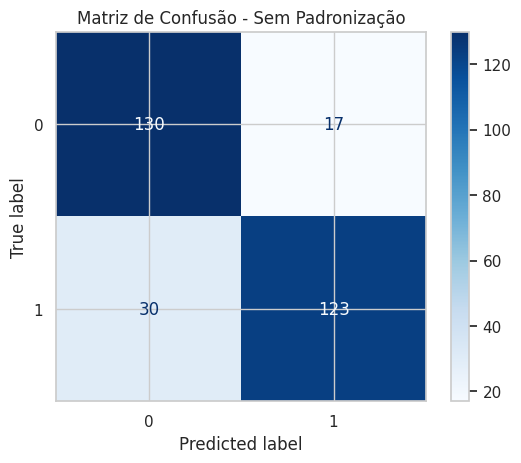

Relatório de Classificação - Sem Padronização:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       147
           1       0.88      0.80      0.84       153

    accuracy                           0.84       300
   macro avg       0.85      0.84      0.84       300
weighted avg       0.85      0.84      0.84       300



In [ ]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - Sem Padronização')
plt.show()

# Exibindo relatório de classificação
print("Relatório de Classificação - Sem Padronização:")
print(classification_report(y_test, y_pred))


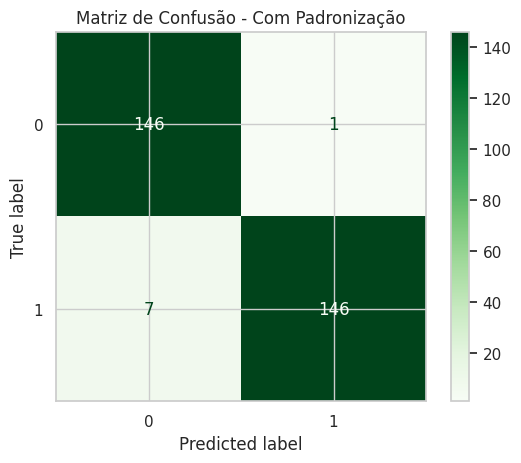

Relatório de Classificação - Com Padronização:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       147
           1       0.99      0.95      0.97       153

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [ ]:
# Calculando a matriz de confusão
cm_scaled = confusion_matrix(y_test_scaled, y_pred_scaled)

# Plotando a matriz de confusão
disp_scaled = ConfusionMatrixDisplay(confusion_matrix=cm_scaled)
disp_scaled.plot(cmap='Greens')
plt.title('Matriz de Confusão - Com Padronização')
plt.show()

# Exibindo relatório de classificação
print("Relatório de Classificação - Com Padronização:")
print(classification_report(y_test_scaled, y_pred_scaled))


O modelo padronizado possui uma quantidade muito menor de erros, com apenas 1 falso positivo e 7 falsos negativos, comparado com 17 falsos positivos e 30 falsos negativos no modelo sem padronização. Isso mostra que a padronização das variáveis ​​melhorou significativamente a capacidade do modelo de classificação corretamente conforme observações.

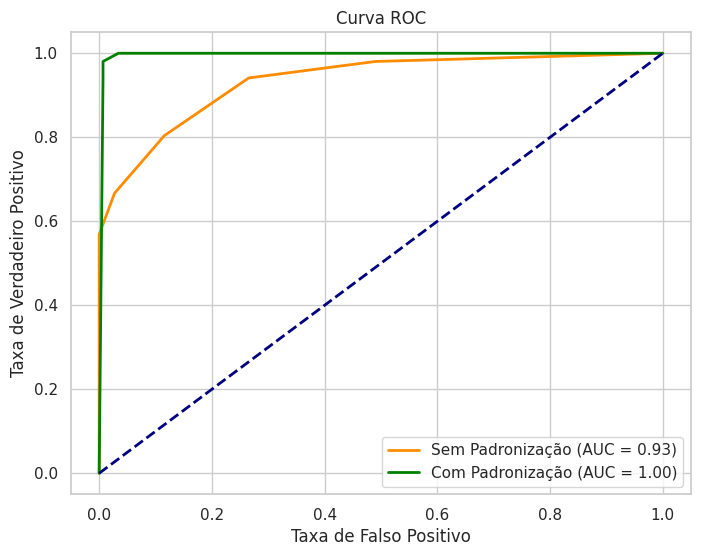

In [ ]:
# Calculando probabilidades de predição
y_prob = knn.predict_proba(X_test)[:, 1]
y_prob_scaled = knn_scaled.predict_proba(X_test_scaled)[:, 1]

# Calculando as taxas de verdadeiro e falso positivo
fpr, tpr, _ = roc_curve(y_test, y_prob)
fpr_scaled, tpr_scaled, _ = roc_curve(y_test_scaled, y_prob_scaled)

# Calculando AUC
roc_auc = auc(fpr, tpr)
roc_auc_scaled = auc(fpr_scaled, tpr_scaled)

# Plotando as curvas ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Sem Padronização (AUC = %0.2f)' % roc_auc)
plt.plot(fpr_scaled, tpr_scaled, color='green', lw=2, label='Com Padronização (AUC = %0.2f)' % roc_auc_scaled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


A curva laranja indica que o modelo sem padronização ainda tem um bom desempenho, com a capacidade de distinguir entre as classes. No entanto, não é perfeito e mostra que o modelo comete alguns erros de classificação.
Curva mais afastada do eixo superior e do lado esquerdo : Mostra que o modelo sem padronização é menos eficiente em maximizar a taxa de verdadeiros positivos enquanto minimiza a taxa de falsos positivos.

Entretento, mesmo sendo algo quase que impossível,a curva verde com Um AUC de 1,00 indica desempenho perfeito do modelo na separação das classes. Isso significa que o modelo padronizado foi capaz de classificar todas as amostras corretamente, sem erros.
Curva colada no eixo ye topo do gráfico : Indica que o modelo com padronização maximiza a taxa de verdadeiros positivos ao mesmo tempo que mantém a taxa de falsos positivos próximos de zero, o que é ideal.

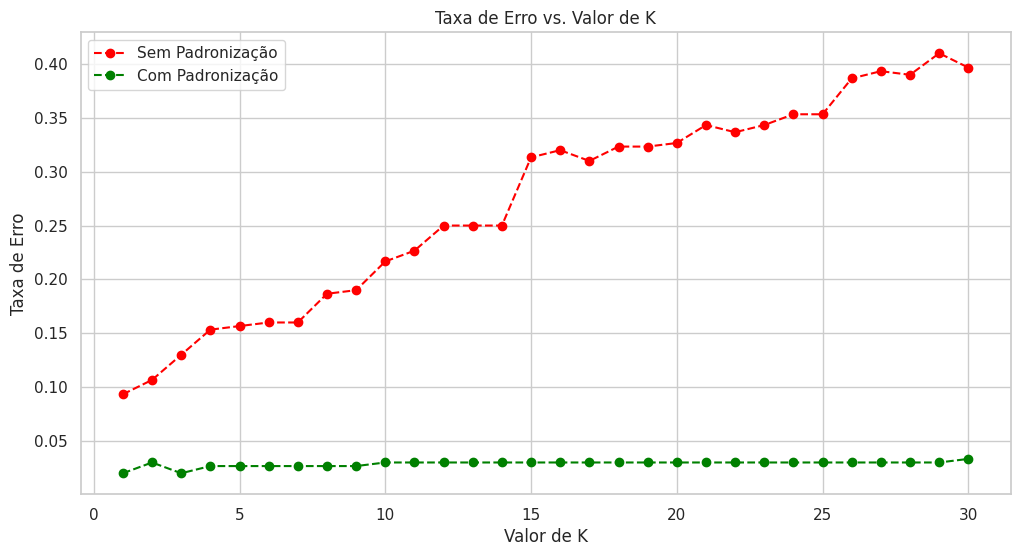

In [ ]:
# Lista de valores de k a serem testados
k_values = range(1, 31)

# Listas para armazenar erros
error_rate = []
error_rate_scaled = []

# Calculando o erro para cada valor de k
for k in k_values:
    # Modelo sem padronização
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

    # Modelo com padronização
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train_scaled)
    pred_k_scaled = knn_scaled.predict(X_test_scaled)
    error_rate_scaled.append(np.mean(pred_k_scaled != y_test_scaled))

# Plotando os erros
plt.figure(figsize=(12,6))
plt.plot(k_values, error_rate, color='red', linestyle='dashed', marker='o', markerfacecolor='red', label='Sem Padronização')
plt.plot(k_values, error_rate_scaled, color='green', linestyle='dashed', marker='o', markerfacecolor='green', label='Com Padronização')
plt.title('Taxa de Erro vs. Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Taxa de Erro')
plt.legend()
plt.show()


Aumento da Taxa de Erro com o aumento de K : Conforme o valor de K aumenta, a taxa de erro também aumenta significativamente, o que indica que o modelo sem padronização está se tornando menos eficaz ao considerar mais vizinhos para fazer suas interferências. Isso ocorre porque, sem padronização, as características em diferentes escalas apresentam características de precisão do modelo.

Independentemente do valor de K, uma taxa de erro permanece muito baixa. Isso mostra que a padronização ajudou a normalizar as escalas das características, permitindo que o algoritmo kNN se beneficiasse de maneira equitativa de todas as informações disponíveis, resultando em um modelo mais robusto.

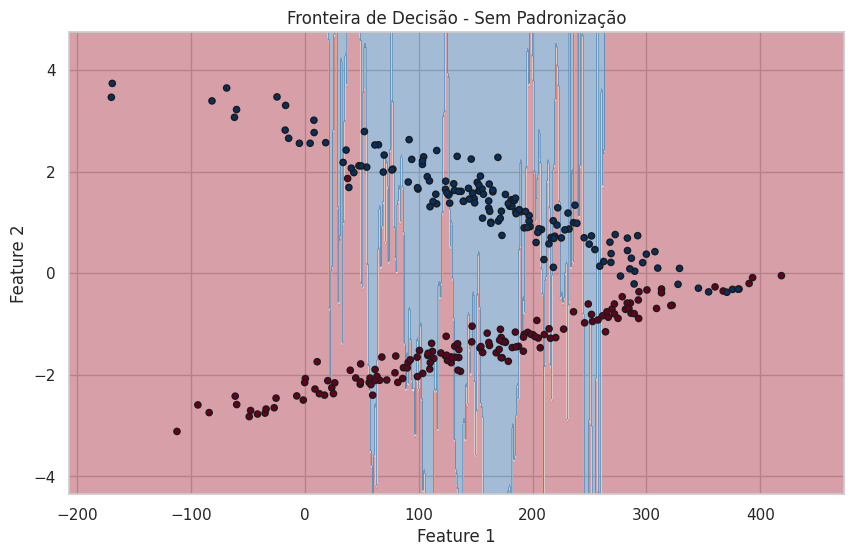

In [ ]:
# Definindo os limites do gráfico
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Criando uma grade de pontos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 0.1))

# Realizando predições em toda a grade
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando a fronteira de decisão e os pontos de dados
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdBu')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolor='k', cmap='RdBu')
plt.title('Fronteira de Decisão - Sem Padronização')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


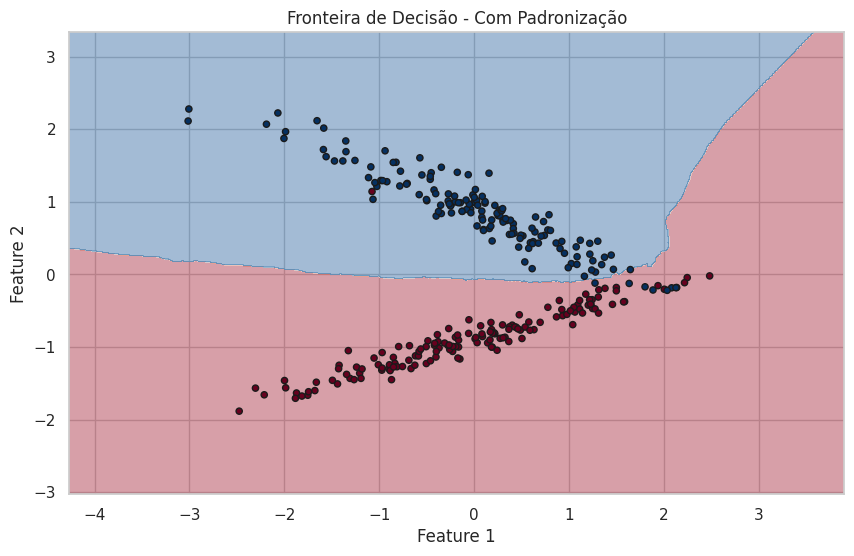

In [ ]:
# Definindo os limites do gráfico
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

# Criando uma grade de pontos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Realizando predições em toda a grade
Z = knn_scaled.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando a fronteira de decisão e os pontos de dados
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdBu')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test_scaled, s=20, edgecolor='k', cmap='RdBu')
plt.title('Fronteira de Decisão - Com Padronização')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


 O gráfico sem padronização apresenta uma fronteira de decisão extremamente complexa e irregular, com várias linhas finas e abruptas separando as classes. Isso indica que o modelo está sendo influenciado por pequenas variações em uma das características, devido à disparidade nas escalas das variações.

 Após a padronização, a fronteira de decisão se torna muito mais suave e regular. Ela agora segue um padrão mais esperado, refletindo uma divisão lógica e consistente entre as classes.